# **Importing Libraries**

In [110]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import re
import random

In [111]:
df = pd.read_csv('taylor_Train.csv',encoding="1252" )

print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   City                                   445 non-null    object
 1   Country                                445 non-null    object
 2   Venue                                  445 non-null    object
 3   Opening act(s)                         444 non-null    object
 4   Attendance (tickets sold / available)  442 non-null    object
 5   Revenue                                442 non-null    object
 6   Tour                                   445 non-null    object
dtypes: object(7)
memory usage: 24.5+ KB
None


,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour
0,Evansville,United States,Roberts Municipal Stadium,Gloriana\r\nKellie Pickler,"7,463 / 7,463","$360,617",Fearless_Tour
1,Jonesboro,United States,Convocation Center,Gloriana\r\nKellie Pickler,"7,822 / 7,822","$340,328",Fearless_Tour
2,St. Louis,United States,Scottrade Center,Gloriana\r\nKellie Pickler,"13,764 / 13,764","$650,420",Fearless_Tour
3,Alexandria,United States,Bishop Ireton High School,Gloriana\r\nKellie Pickler,—,—,Fearless_Tour
4,North Charleston,United States,North Charleston Coliseum,Gloriana\r\nKellie Pickler,"8,751 / 8,751","$398,154",Fearless_Tour
...,...,...,...,...,...,...,...
440,Sydney,Australia,ANZ Stadium,Charli XCX\r\nBroods,"72,805 / 72,805","$7,686,564",Reputation_Stadium_Tour
441,Brisbane,Australia,The Gabba,Charli XCX\r\nBroods,"43,907 / 43,907","$4,338,127",Reputation_Stadium_Tour
442,Auckland,New Zealand,Mount Smart Stadium,Charli XCX\r\nBroods,"35,749 / 35,749","$3,617,593",Reputation_Stadium_Tour
443,Tokyo,Japan,Tokyo Dome,Charli XCX,"100,109 / 100,109","$14,859,847",Reputation_Stadium_Tour


In [112]:
new_col = {
    'City':'City',                                    
    'Country':'Country',                                   
    'Venue':'Venue',                                    
    'Opening act(s)':'Opening_act',                           
    'Attendance (tickets sold / available)':'Tickets_sold_and_available',    
    'Revenue':'Revenue',                               
    'Tour':'Tour',             
}
df = df.rename(columns=new_col)
df.sample(4).T


,64,184,227,334
City,Newcastle,Salt Lake City,Newark,Chicago
Country,Australia,United States,United States,United States
Venue,Newcastle Entertainment Centre,EnergySolutions Arena,Prudential Center,Soldier Field
Opening_act,Gloriana,Needtobreathe,Ed Sheeran\r\nFlorida Georgia Line,Vance Joy\r\nShawn Mendes\r\nHaim
Tickets_sold_and_available,"7,180 / 7,180","13,720 / 13,720","38,065 / 38,065","110,109 / 110,109"
Revenue,"$555,396","$896,946","$3,565,317","$11,469,887"
Tour,Fearless_Tour,Speak_Now_World_Tour,The_Red_Tour,The_1989_World_Tour


# **Getting all the unavailable data areas**

In [113]:
df = df.replace('—',None)

In [114]:
df.isnull().sum()

City                           0
Country                        0
Venue                          0
Opening_act                   31
Tickets_sold_and_available    38
Revenue                       39
Tour                           0
dtype: int64

<Axes: >

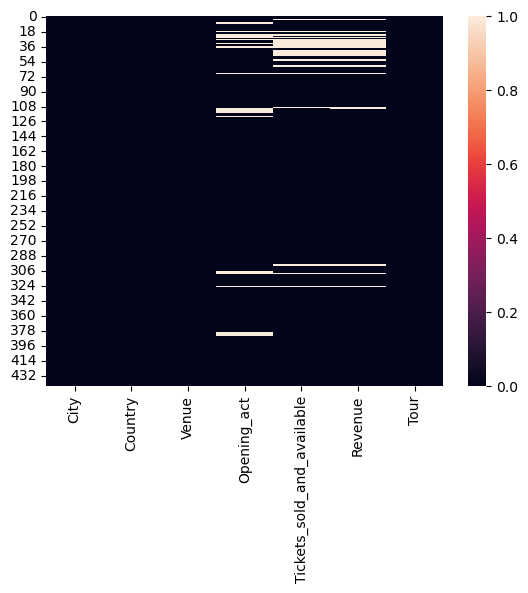

In [115]:
# Spread of unavailable values
sns.heatmap(df.isnull())

**Major chunk of unavailable data is from Fearless Tour**

# **Data Cleaning,Organizing And Imputation**


In [116]:
# EXAMPLE
df[df['Venue'] == 'The O2 Arena']


,City,Country,Venue,Opening_act,Tickets_sold_and_available,Revenue,Tour
129,London,England,The O2 Arena,Martin & James,"15,265 / 15,681","$891,152",Speak_Now_World_Tour
294,London,England,The O2 Arena,The Vamps,"74,740 / 74,740","$5,829,240",The_Red_Tour
295,London,England,The O2 Arena,The Vamps,"74,740 / 74,740","$5,829,240",The_Red_Tour
296,London,England,The O2 Arena,The Vamps,"74,740 / 74,740","$5,829,240",The_Red_Tour
298,London,England,The O2 Arena,The Vamps,NaN,NaN,The_Red_Tour
299,London,England,The O2 Arena,The Vamps,NaN,NaN,The_Red_Tour


**The given information suggests that the data for the Red Tour's revenue at the O2 Arena is inaccurate due to repeated and null values. This can lead to incorrect calculations and insights. Therefore, it's necessary to clean and correct the data before proceeding with further analysis.**

In [117]:
# Find all the null Revenue rows
df22 = df.query('Revenue != Revenue')
print(df22.shape)
df22.head(39)

(39, 7)


,City,Country,Venue,Opening_act,Tickets_sold_and_available,Revenue,Tour
3,Alexandria,United States,Bishop Ireton High School,Gloriana\r\nKellie Pickler,None,None,Fearless_Tour
18,New Brockton,United States,BamaJam Farms,None,None,None,Fearless_Tour
21,Oshkosh,United States,Ford Festival Park,None,None,None,Fearless_Tour
22,Cadott,United States,Amphitheatre Concert Grounds,None,None,None,Fearless_Tour
23,Calgary,Canada,Pengrowth Saddledome,Gloriana\r\nKellie Pickler,None,None,Fearless_Tour
25,Craven,Canada,Big Valley Park,None,None,None,Fearless_Tour
27,Twin Lakes,United States,Country Thunder Festival,None,None,None,Fearless_Tour
28,Columbus,United States,Value City Arena,Gloriana\r\nKellie Pickler,None,None,Fearless_Tour
29,Charleston,United States,Charleston Civic Center,Gloriana\r\nKellie Pickler,None,None,Fearless_Tour
30,Cheyenne,United States,Cheyenne Frontier Days Arena,Kellie Pickler,None,None,Fearless_Tour


**Majority unavailable revenue are from fearless tour**

In [118]:
# Finding if there is available data for the venues in the rows with null values
venue_list = df22['Venue'].unique()
df3 = df[df['Venue'].isin(venue_list)]
df3 = df3.dropna()
print(df3.shape)
df3.head(17)

(15, 7)


,City,Country,Venue,Opening_act,Tickets_sold_and_available,Revenue,Tour
111,Singapore,Singapore,Singapore Indoor Stadium,Sezairi Sezali,"8,964 / 8,964","$916,850",Speak_Now_World_Tour
128,Manchester,England,Manchester Evening News Arena,Martin & James,"10,488 / 11,622","$580,558",Speak_Now_World_Tour
129,London,England,The O2 Arena,Martin & James,"15,265 / 15,681","$891,152",Speak_Now_World_Tour
130,Omaha,United States,Qwest Center Omaha,Needtobreathe,"26,992 / 26,992","$1,717,104",Speak_Now_World_Tour
131,Omaha,United States,Qwest Center Omaha,Needtobreathe,"26,992 / 26,992","$1,717,104",Speak_Now_World_Tour
155,Grand Rapids,United States,Van Andel Arena,Needtobreathe,"11,012 / 11,012","$724,854",Speak_Now_World_Tour
181,Tulsa,United States,BOK Center,Needtobreathe,"12,546 / 12,546","$907,573",Speak_Now_World_Tour
204,Charlotte,United States,Time Warner Cable Arena,Needtobreathe,"14,272 / 14,272","$920,903",Speak_Now_World_Tour
225,Charlotte,United States,Time Warner Cable Arena,Ed Sheeran\r\nBrett Eldredge,"14,686 / 14,686","$1,162,733",The_Red_Tour
268,Tulsa,United States,BOK Center,Ed Sheeran\r\nCasey James,"10,949 / 10,949","$868,955",The_Red_Tour


In [119]:
# Imputing found estimate values
df.loc[35,"Tickets_sold_and_available"] = "26,992 / 26,992"
df.loc[44,"Tickets_sold_and_available"] = "14,272 / 14,272"
df.loc[51,"Tickets_sold_and_available"] = "12,546 / 12,546"
df.loc[53,"Tickets_sold_and_available"] = "11,012 / 11,012"
df.loc[60,"Tickets_sold_and_available"] = "10,488 / 11,622"

# These are duplicates but imputing them will help further in recognizing and dropping them
df.loc[298,"Tickets_sold_and_available"] = "74,740 / 74,740"
df.loc[298,"Revenue"] = "$5,829,240"
df.loc[299,"Tickets_sold_and_available"] = "74,740 / 74,740"
df.loc[299,"Revenue"] = "$5,829,240"
df.loc[306,"Tickets_sold_and_available"] = "16,344 / 16,344"
df.loc[306,"Revenue"] = "$2,524,080"

df.loc[309,"Tickets_sold_and_available"] = "80,000 / 80,000"#from web sources
df.loc[325,"Tickets_sold_and_available"] = "65,000 / 65,000" 

df.isnull().sum()

City                           0
Country                        0
Venue                          0
Opening_act                   31
Tickets_sold_and_available    28
Revenue                       36
Tour                           0
dtype: int64

In [120]:
# Getting the dupicate rows and adding 0 to tickets and revenue to them.
# Finding duplicate rows
dupe = df.duplicated()
# Getting their index in the dataframe
dupe_idx = df[dupe].index
print("Nummber of dupicate rows: ",len(dupe_idx))
# Imputing 0 to those rows
for dupes in dupe_idx:
    df.at[dupes,'Tickets_sold_and_available'] = '0 / 0'
    df.at[dupes,'Revenue'] = "0"
    
df[df['Venue'] == 'The O2 Arena']

Nummber of dupicate rows:  114


,City,Country,Venue,Opening_act,Tickets_sold_and_available,Revenue,Tour
129,London,England,The O2 Arena,Martin & James,"15,265 / 15,681","$891,152",Speak_Now_World_Tour
294,London,England,The O2 Arena,The Vamps,"74,740 / 74,740","$5,829,240",The_Red_Tour
295,London,England,The O2 Arena,The Vamps,0 / 0,0,The_Red_Tour
296,London,England,The O2 Arena,The Vamps,0 / 0,0,The_Red_Tour
298,London,England,The O2 Arena,The Vamps,0 / 0,0,The_Red_Tour
299,London,England,The O2 Arena,The Vamps,0 / 0,0,The_Red_Tour


In [121]:
# Imputing missing Opening acts with forward fill
df['Opening_act'].fillna(method='ffill', inplace=True)
df.iloc[3:9]

/var/folders/7q/mmsvwt216012x_g_x9fgkp6h0000gn/T/ipykernel_2437/3205531828.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Opening_act'].fillna(method='ffill', inplace=True)


,City,Country,Venue,Opening_act,Tickets_sold_and_available,Revenue,Tour
3,Alexandria,United States,Bishop Ireton High School,Gloriana\r\nKellie Pickler,None,None,Fearless_Tour
4,North Charleston,United States,North Charleston Coliseum,Gloriana\r\nKellie Pickler,"8,751 / 8,751","$398,154",Fearless_Tour
5,Jacksonville,United States,Jacksonville Veterans Memorial Arena,Gloriana\r\nKellie Pickler,"11,072 / 11,072","$507,012",Fearless_Tour
6,Biloxi,United States,Mississippi Coast Coliseum,Gloriana\r\nKellie Pickler,"9,436 / 9,436","$437,313",Fearless_Tour
7,London,England,Shepherd's Bush Empire,Gloriana\r\nKellie Pickler,"6,789 / 6,789","$401,328",Fearless_Tour
8,London,England,Shepherd's Bush Empire,Gloriana\r\nKellie Pickler,0 / 0,0,Fearless_Tour


In [122]:
# Splitting Tickets_sold_and_available to separate columns tickets_sold and tickets_available
def tickets_sold(val):
    if val:
        sold = val.split("/")[0]
    else:
        sold = 0
    return sold

def tickets_available(val):
    if val:
        avl = val.split("/")[1]
    else:
        avl = 0
    return avl

df["tickets_sold"] = df["Tickets_sold_and_available"].apply(tickets_sold)
# Removing Special characters for smooth numerical operations and calculations
df["tickets_sold"] = df["tickets_sold"].str.replace(",","")
df["tickets_available"] = df["Tickets_sold_and_available"].apply(tickets_available)
df["tickets_available"] = df["tickets_available"].str.replace(",","")
df["Revenue"] = df["Revenue"].str.replace('$','').str.replace(',','')
df = df.drop("Tickets_sold_and_available",axis=1)
df.dtypes

City                 object
Country              object
Venue                object
Opening_act          object
Revenue              object
Tour                 object
tickets_sold         object
tickets_available    object
dtype: object

In [123]:
# Converting required features to integer to perform calculations and imputing 3 to None values in the dataset in order to identify genuine missing data in further calculations for imputation rather than mixing it with duplicates
df['tickets_sold'] = df['tickets_sold'].fillna(3).astype(int)
df['tickets_available'] = df['tickets_available'].fillna(3).astype(int)
df['Revenue'] = df['Revenue'].fillna(3).astype(int)
print(df.dtypes)
df.head(4)


City                 object
Country              object
Venue                object
Opening_act          object
Revenue               int64
Tour                 object
tickets_sold          int64
tickets_available     int64
dtype: object


,City,Country,Venue,Opening_act,Revenue,Tour,tickets_sold,tickets_available
0,Evansville,United States,Roberts Municipal Stadium,Gloriana\r\nKellie Pickler,360617,Fearless_Tour,7463,7463
1,Jonesboro,United States,Convocation Center,Gloriana\r\nKellie Pickler,340328,Fearless_Tour,7822,7822
2,St. Louis,United States,Scottrade Center,Gloriana\r\nKellie Pickler,650420,Fearless_Tour,13764,13764
3,Alexandria,United States,Bishop Ireton High School,Gloriana\r\nKellie Pickler,3,Fearless_Tour,3,3


In [124]:
# Getting the available data for tickets sold in Fearless Tour and calculating the central tendency
fearles_ticks = df[(df['Tour']=='Fearless_Tour') & (df['tickets_sold']>5)]
fearles_ticks = fearles_ticks.sort_values(by='tickets_sold',ascending=True)
q1 = fearles_ticks['tickets_sold'].quantile(0.25)
q3 = fearles_ticks['tickets_sold'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
fearles_ticks = fearles_ticks[(fearles_ticks['tickets_sold']>=lower_bound ) & (fearles_ticks['tickets_sold']<=upper_bound )]
fear_mean = fearles_ticks['tickets_sold'].mean()
fear_mean = fear_mean.round().astype(int)
print(fearles_ticks.shape)
print("The mean is: ",fear_mean)

(58, 8)
The mean is:  12877


In [125]:
# Checking tickets sold to available percentage
sold_avail_ratio = fearles_ticks['tickets_available'] / fearles_ticks['tickets_sold'] * 100
less = sold_avail_ratio[sold_avail_ratio < 99.00]
print("NO of values having less than 99% sold to available ratio is: ",len(less))
less

NO of values having less than 99% sold to available ratio is:  0


Series([], dtype: float64)

In [126]:
# Replacing all the genuine missing values of Revenue 
df['tickets_sold'].replace(3,fear_mean,inplace=True)
df['tickets_available'].replace(3,fear_mean,inplace=True)
print(df.isnull().sum())
df.head(4)

City                 0
Country              0
Venue                0
Opening_act          0
Revenue              0
Tour                 0
tickets_sold         0
tickets_available    0
dtype: int64


,City,Country,Venue,Opening_act,Revenue,Tour,tickets_sold,tickets_available
0,Evansville,United States,Roberts Municipal Stadium,Gloriana\r\nKellie Pickler,360617,Fearless_Tour,7463,7463
1,Jonesboro,United States,Convocation Center,Gloriana\r\nKellie Pickler,340328,Fearless_Tour,7822,7822
2,St. Louis,United States,Scottrade Center,Gloriana\r\nKellie Pickler,650420,Fearless_Tour,13764,13764
3,Alexandria,United States,Bishop Ireton High School,Gloriana\r\nKellie Pickler,3,Fearless_Tour,12877,12877


In [127]:
# Estimating cost per ticket
df['Cost_per_ticket'] = df['Revenue'] / df['tickets_sold']

In [128]:
df.iloc[3:9]

,City,Country,Venue,Opening_act,Revenue,Tour,tickets_sold,tickets_available,Cost_per_ticket
3,Alexandria,United States,Bishop Ireton High School,Gloriana\r\nKellie Pickler,3,Fearless_Tour,12877,12877,0.000233
4,North Charleston,United States,North Charleston Coliseum,Gloriana\r\nKellie Pickler,398154,Fearless_Tour,8751,8751,45.498115
5,Jacksonville,United States,Jacksonville Veterans Memorial Arena,Gloriana\r\nKellie Pickler,507012,Fearless_Tour,11072,11072,45.792269
6,Biloxi,United States,Mississippi Coast Coliseum,Gloriana\r\nKellie Pickler,437313,Fearless_Tour,9436,9436,46.345167
7,London,England,Shepherd's Bush Empire,Gloriana\r\nKellie Pickler,401328,Fearless_Tour,6789,6789,59.114450
8,London,England,Shepherd's Bush Empire,Gloriana\r\nKellie Pickler,0,Fearless_Tour,0,0,NaN


In [129]:
# Repositioning Columns
repos_index = ["City","Country","Venue","tickets_sold","tickets_available","Revenue","Cost_per_ticket","Tour","Opening_act"]
df = df.reindex(columns=repos_index)

In [130]:
# Finding central tendency of cost per ticket to impute
rev_cal = df[(df["Tour"]=="Fearless_Tour") & (df["Revenue"]>5)]
rev_cal = rev_cal.sort_values(by="Revenue",ascending=True)
q1_1 = rev_cal['Cost_per_ticket'].quantile(0.25)
q3_1 = rev_cal['Cost_per_ticket'].quantile(0.75)
iqr_1 = q3_1 - q1_1
lower_bound_1 = q1_1 - 1.5 * iqr_1
upper_bound_1 = q3_1 + 1.5 * iqr_1
rev_cal = rev_cal[(rev_cal['Cost_per_ticket']>=lower_bound_1 ) & (rev_cal['Cost_per_ticket']<=upper_bound_1)]
print(rev_cal.shape)
per_ticket_central_tendency = rev_cal['Cost_per_ticket'].mean().round()
print(per_ticket_central_tendency)
# rev_cal


(62, 9)
55.0


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

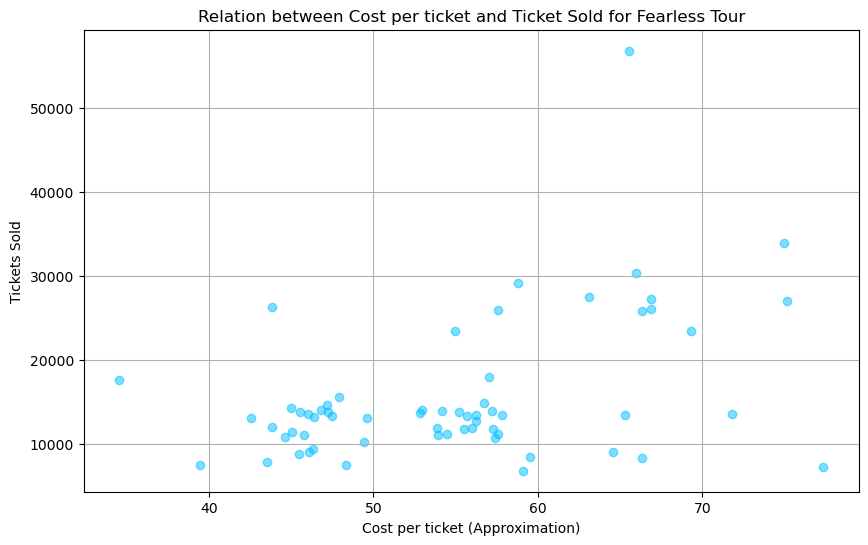

In [131]:
# Plotting to see the distribution of cost per ticket for Fearless Tour to get a range to impute 
ticket_sold = rev_cal["tickets_sold"]
cost_per_ticket = rev_cal['Cost_per_ticket']

plt.figure(figsize=(10,6))
plt.scatter(cost_per_ticket,ticket_sold,color='deepskyblue',alpha=0.5)
plt.xlabel('Cost per ticket (Approximation)')
plt.ylabel('Tickets Sold')
plt.title("Relation between Cost per ticket and Ticket Sold for Fearless Tour")
plt.grid(True)
plt

**We can see that most of the number of tickets sold are between 10000 and 20000 and the clustring of cost per ticket is in the ranges 44 to 49 and 52 to 58 **

In [132]:
# Imputing Cost per ticket values and Calculating revenues for genuine values with the average cost per ticket for fearless tour and its ticket sold
gen1_val = df['Revenue']== 3
gen1_val 
gen1_idx = df[gen1_val].index
gen1_idx
for vals in gen1_idx:
    # Imputing Cost Per Ticket between a range 46 - 54
    df.at[vals,'Cost_per_ticket']= random.randint(46,54)
    df.at[vals,'Revenue'] = df.at[vals,'tickets_sold'] * df.at[vals,'Cost_per_ticket'] 
df.head()

,City,Country,Venue,tickets_sold,tickets_available,Revenue,Cost_per_ticket,Tour,Opening_act
0,Evansville,United States,Roberts Municipal Stadium,7463,7463,360617,48.320649,Fearless_Tour,Gloriana\r\nKellie Pickler
1,Jonesboro,United States,Convocation Center,7822,7822,340328,43.509077,Fearless_Tour,Gloriana\r\nKellie Pickler
2,St. Louis,United States,Scottrade Center,13764,13764,650420,47.255158,Fearless_Tour,Gloriana\r\nKellie Pickler
3,Alexandria,United States,Bishop Ireton High School,12877,12877,592342,46.000000,Fearless_Tour,Gloriana\r\nKellie Pickler
4,North Charleston,United States,North Charleston Coliseum,8751,8751,398154,45.498115,Fearless_Tour,Gloriana\r\nKellie Pickler


In [133]:
# Creating a dataframe copy without duplicate values
without_duplicates = df[df['tickets_sold'] != 0]
without_duplicates.shape
# This dataframe doesn,t have any duplicated value and can be used for calculation, the df dataframe with the original values is also needed as it gives info on nuber of events, etc.

(331, 9)

# **VISUALIZATION**

1. Fearless Tour - 2009-10
2. Speak Now World Tour - 2011-12
3. The Red Tour - 2013-14
4. The 1989 World Tour - 2015
5. Reputation Tour - 2018


In [134]:
df['Tour'].value_counts()

Tour
Fearless_Tour              111
Speak_Now_World_Tour       110
The_Red_Tour                86
The_1989_World_Tour         85
Reputation_Stadium_Tour     53
Name: count, dtype: int64

1. **The events are spread over 5 Tours as listed above.**

2. **We can also see that the number of events she has performed for a tour has decreased over the years. The Reputation tour being the latest in the dataset having almost 50% less shows than we she had performed for her first tour.**

<Axes: title={'center': 'Events per Tour'}, xlabel='No. of Events', ylabel='Tour'>

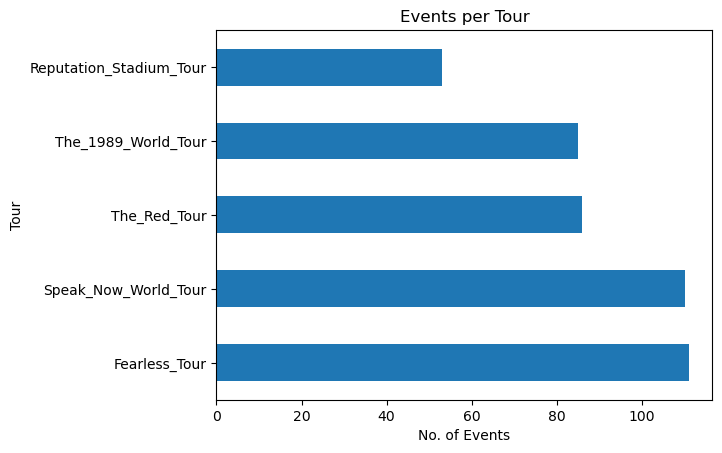

In [135]:
df['Tour'].value_counts().plot(kind='barh',title="Events per Tour",xlabel='No. of Events')

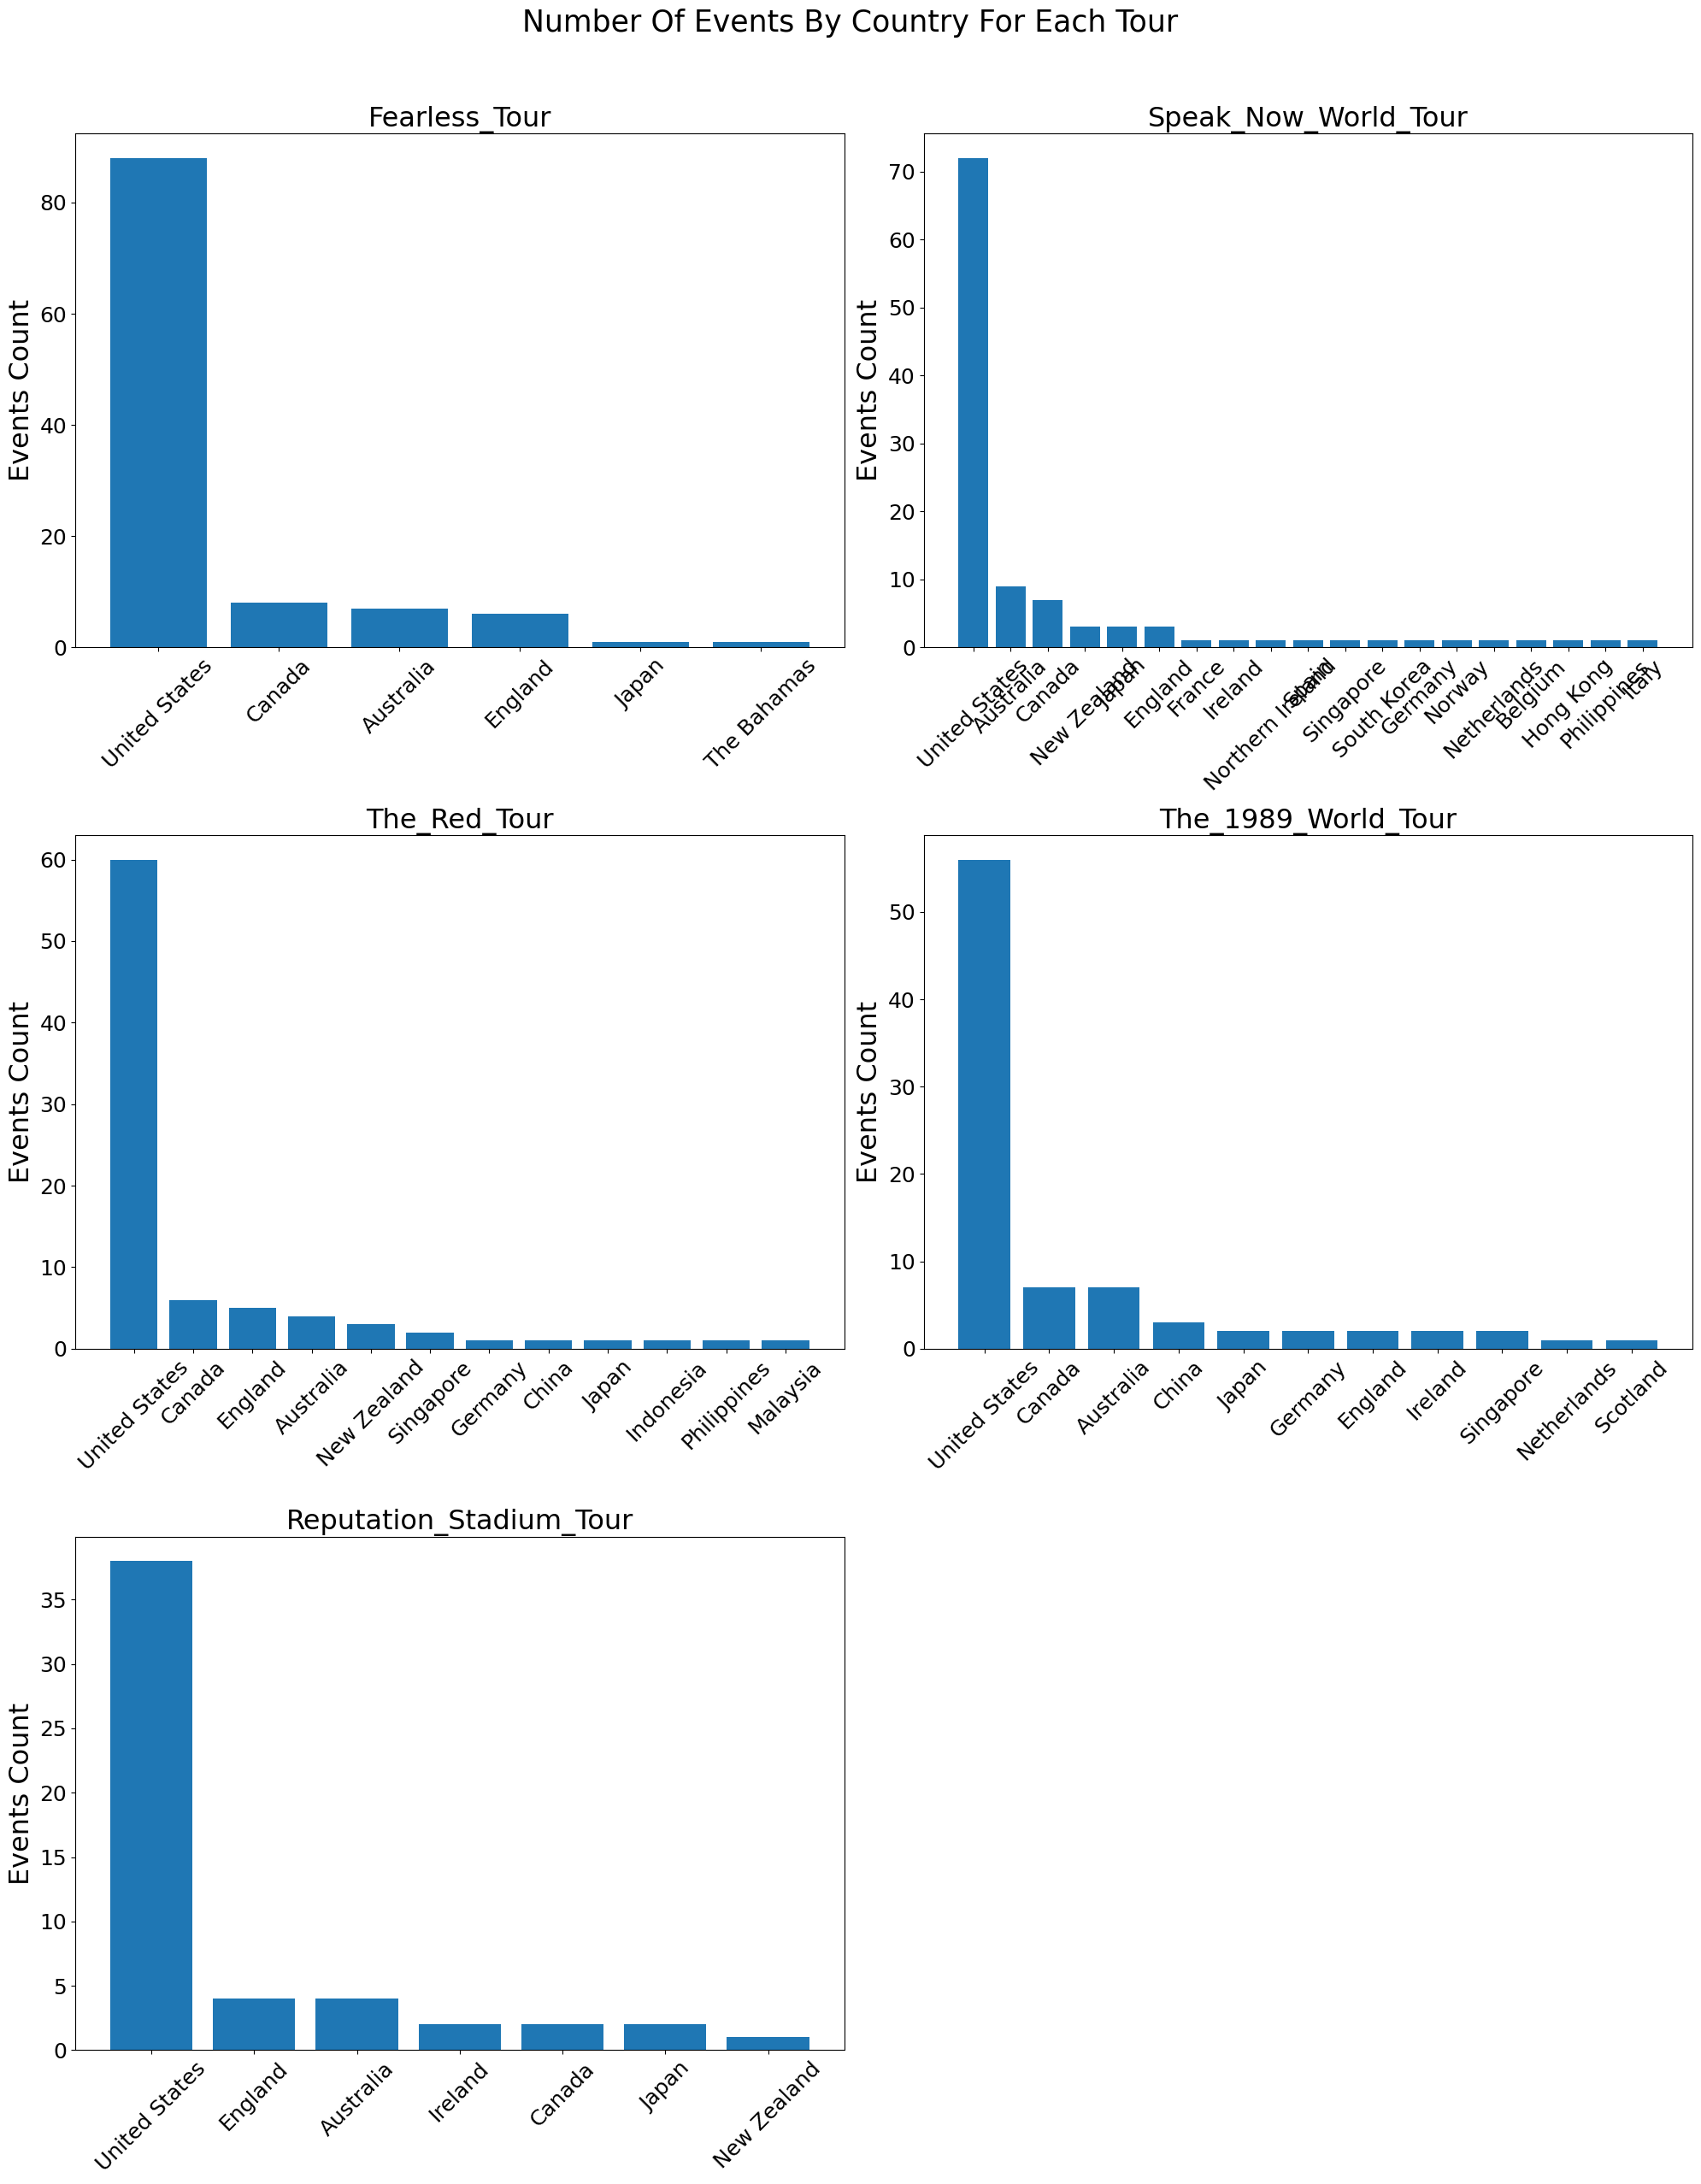

In [136]:
# Finding Number Of Events By Country For Each Tour
unique_tours = df['Tour'].unique()

# Calculate the number of rows and columns for subplot layout
num_rows = 3
num_cols = 2

# Create a figure and a grid of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 25))
grid = GridSpec(1, 2, width_ratios=[1, 1])

# Flatten the axs array to iterate through subplots
axs = axs.flatten()

for idx, tour in enumerate(unique_tours):
    # Filter DataFrame for the current tour
    tour_df = df[df['Tour'] == tour]
    
    # Calculate value counts of countries
    country_counts = tour_df['Country'].value_counts()
    
    # Plot the bar graph for the current tour
    ax = axs[idx]
    ax.bar(country_counts.index, country_counts.values)
    ax.set_title(tour,fontsize=23)
    ax.set_ylabel('Events Count',fontsize=23)
    ax.tick_params(axis='x', rotation=45,labelsize=18)
    ax.tick_params(axis='y', labelsize=18)
    
# Hide any remaining empty subplots
for i in range(len(unique_tours), num_rows * num_cols):
    axs[i].axis('off')
    
fig.suptitle('Number Of Events By Country For Each Tour', fontsize=25, y=1.02)

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Display the plot
plt.show()

1. **The events are maily over western and european countries, the number of asian countries are very little and actually have decreased and middle eastern countries are close to none, even with time this trend has not seen a considerable change.**

2. **US stands at the top for every tour, the events have decreased tho which are directly related to the overall decrease in shows over the years.**

3. **The Speak Now World Tour which is Taylor's second tour has the highest number of countries performed in, from there its a downhill.**

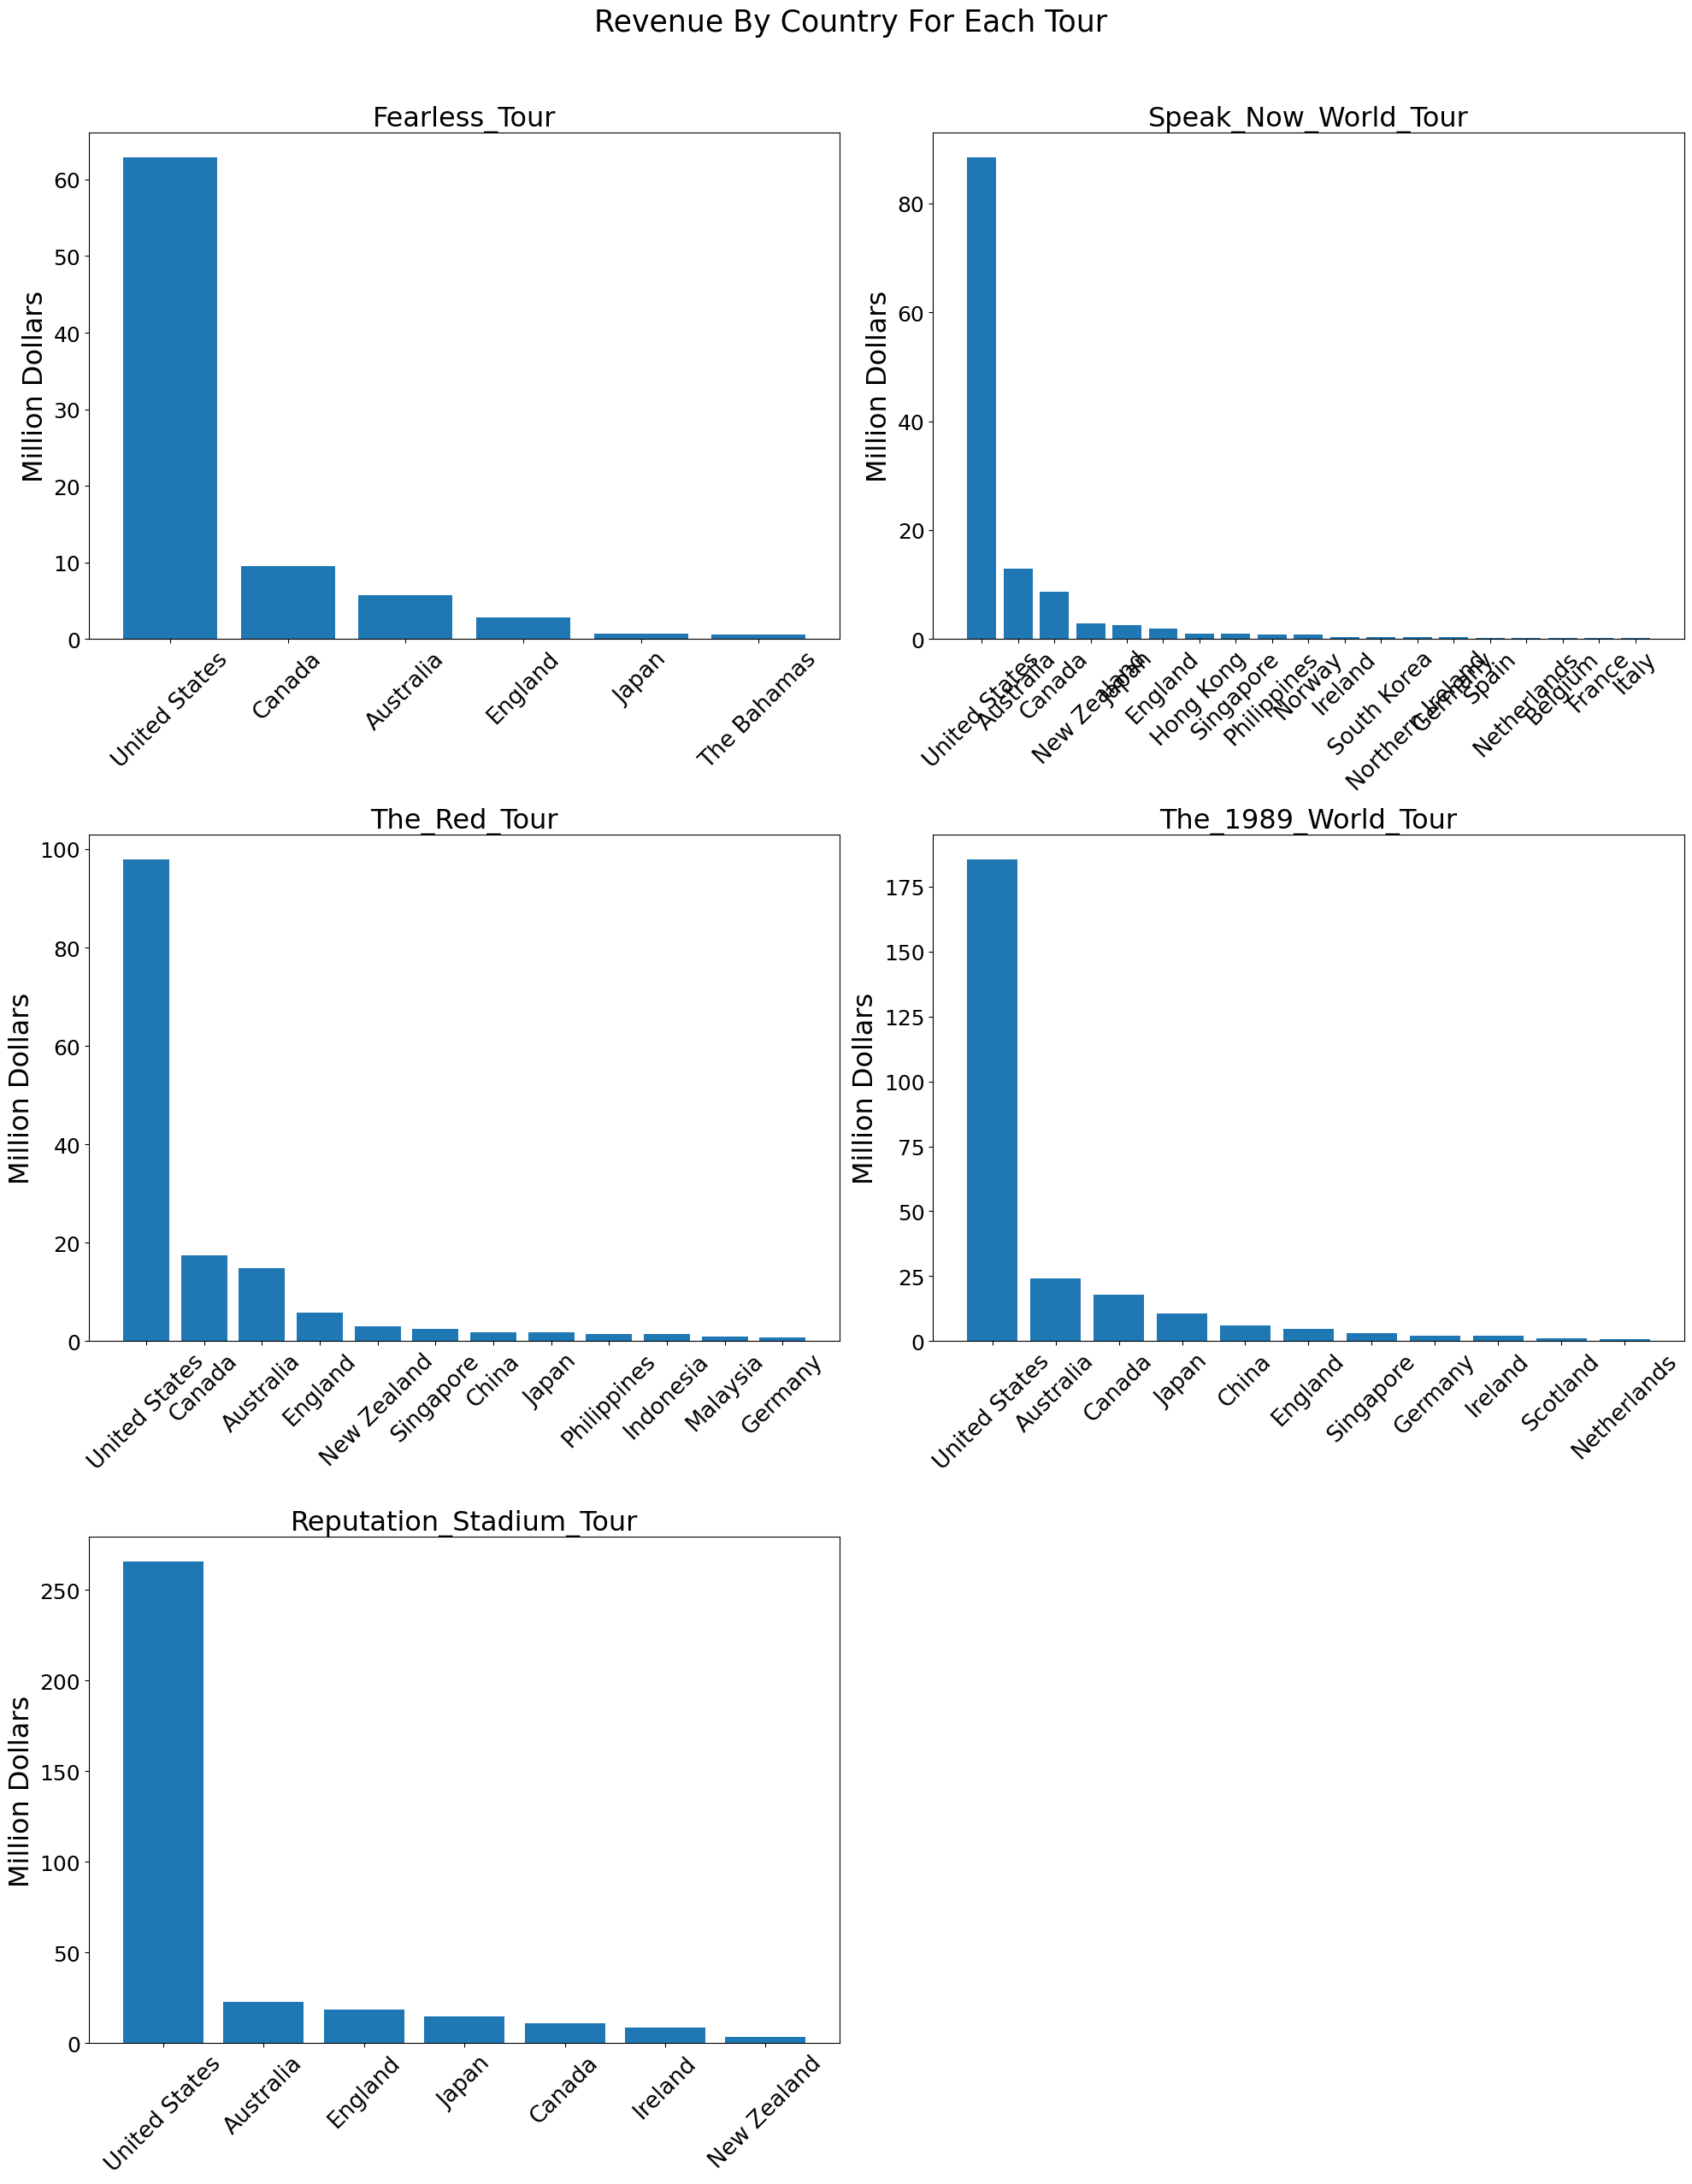

In [137]:
# Finding Revenue By Country For Each Tour

unique_tours = without_duplicates['Tour'].unique()

# Calculate the number of rows and columns for subplot layout
num_rows = 3
num_cols = 2

# Create a figure and a grid of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 25))
grid = GridSpec(1, 2, width_ratios=[1, 1])

# Flatten the axs array to iterate through subplots
axs = axs.flatten()

for idx, tour in enumerate(unique_tours):
    # Filter DataFrame for the current tour
    tour_df = without_duplicates[without_duplicates['Tour'] == tour]
    
    # Calculate value counts of countries
#     country_counts = tour_df['Country'].value_counts()
    revenue_country = tour_df.groupby(["Country"]).sum()[["Revenue"]]
    revenue_country["Revenue"] = revenue_country["Revenue"]/1_000_000
    revenue_country = revenue_country.sort_values(by="Revenue",ascending=False)
    
    # Plot the bar graph for the current tour
    ax = axs[idx]
    ax.bar(revenue_country.index, revenue_country.iloc[:,0])
    ax.set_title(tour,fontsize=23)
    ax.set_ylabel('Million Dollars',fontsize=23)
    ax.tick_params(axis='x', rotation=45,labelsize=19)
    ax.tick_params(axis='y', labelsize=18)
    
# Hide any remaining empty subplots
for i in range(len(unique_tours), num_rows * num_cols):
    axs[i].axis('off')

# plt.suptitle('Revenue by Country for Different Tours', fontsize=25)
fig.suptitle('Revenue By Country For Each Tour', fontsize=25, y=1.02)
# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Display the plot
plt.show()

1. **US has had the highest revenue generation for each tour and has seen a major growth over the years touching 250+ million dollars alone out of the approximately 345 million dollars generated in the last tour.**

2. **Canada and Australia comes next but cannot be caompared in terms of revenue generation.**

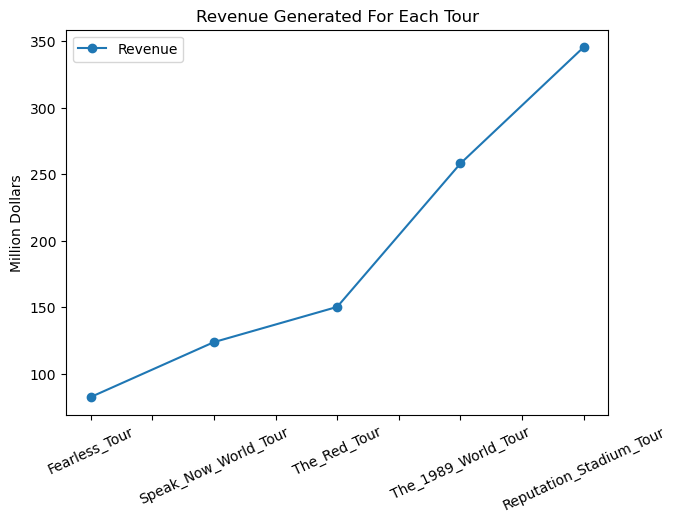

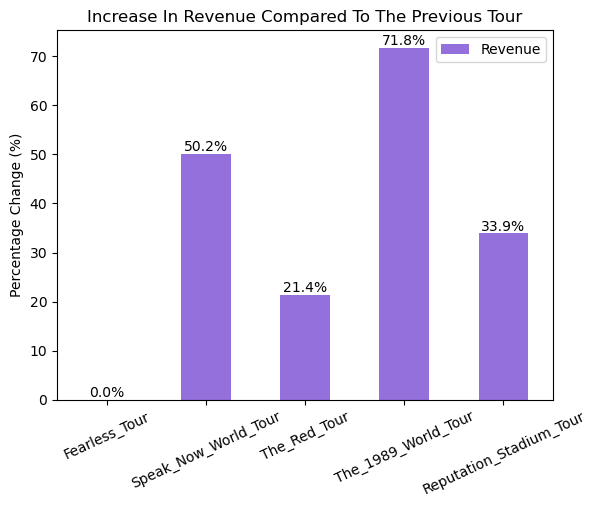

,Tour,Revenue(million $)
0,Fearless_Tour,82.371815
1,Speak_Now_World_Tour,123.691679
2,The_Red_Tour,150.184971
3,The_1989_World_Tour,258.013097
4,Reputation_Stadium_Tour,345.508465


In [138]:
# Finding Revenue By Tour And Growth In Revenue Compared To The Previous Tour

# Revenue Graph
revenue_by_tour = without_duplicates.groupby(["Tour"]).sum()[["Revenue"]]
revenue_by_tour["Revenue"] = revenue_by_tour["Revenue"]/1_000_000
revenue_by_tour = revenue_by_tour.sort_values(by="Revenue",ascending=True)
revenue_by_tour.plot(kind='line',marker='o',title="Revenue Generated For Each Tour",rot=25,xlabel='',ylabel="Million Dollars",figsize=(7,5))

# Growth percentage tour on tour
percent_change = revenue_by_tour.pct_change() * 100
# Create a bar plot for percentage change in revenue
ax = percent_change.plot(kind='bar',xlabel='', color='mediumpurple',rot=25)
# Add percentage values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title('Increase In Revenue Compared To The Previous Tour')
plt.ylabel('Percentage Change (%)')
# Show the plot
plt.show()

# Revenue Table
revenue_by_tour = revenue_by_tour.reset_index()
revenue_by_tour = revenue_by_tour.rename(columns={'Tour':'Tour','Revenue':'Revenue(million $)'})
revenue_by_tour

1. **The Revenue has seen a steady growth over the years.**

2. **Revenue has jumped atleast 20% more or higher with each tour.**

3. **The Revenue generation for the Reputatio Tour has grown more than 300% when compared to the First Tour, while the number of events per tour has decreased.**

,Tour,Highest Revenue Generated For A Single Event (million dollars)
0,Fearless_Tour,3.726157
1,Speak_Now_World_Tour,8.026350
2,The_Red_Tour,9.464063
3,The_1989_World_Tour,13.423858
4,Reputation_Stadium_Tour,22.031386


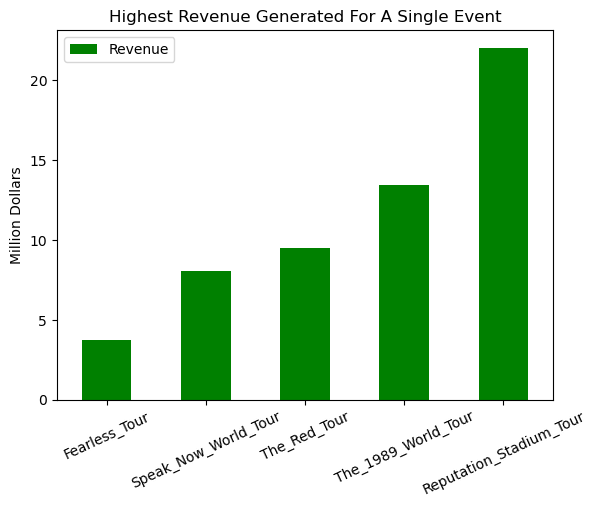

In [139]:
highest_rev = without_duplicates.groupby(["Tour"]).max()[["Revenue"]].sort_values(by='Revenue',ascending=True)
highest_rev = highest_rev/1000000
highest_rev.plot(kind='bar',title='Highest Revenue Generated For A Single Event',color='green',ylabel='Million Dollars',xlabel='',rot=25)
highest_rev = highest_rev.reset_index().rename(columns={'Tour':'Tour','Revenue':'Highest Revenue Generated For A Single Event (million dollars)'})
highest_rev

,Tour,Highest Tickets Sold For A Single Event
0,Fearless_Tour,56868
1,The_Red_Tour,110712
2,Speak_Now_World_Tour,110800
3,The_1989_World_Tour,116849
4,Reputation_Stadium_Tour,174764


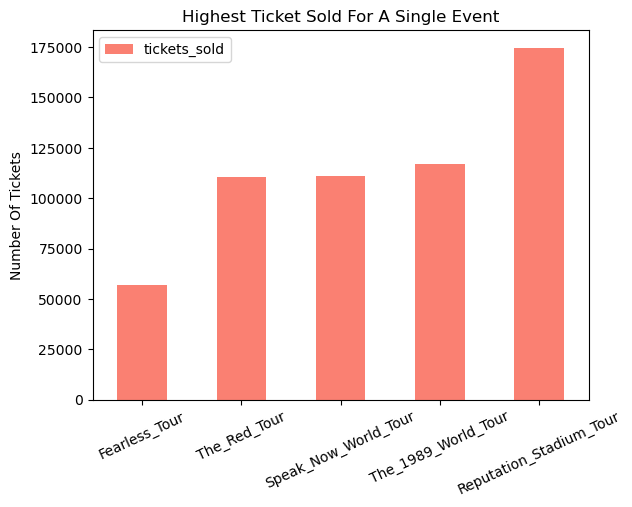

In [140]:
highest_tickets = without_duplicates.groupby(["Tour"]).max()[["tickets_sold"]].sort_values(by='tickets_sold',ascending=True)
highest_tickets.plot(kind='bar',title='Highest Ticket Sold For A Single Event',color='salmon',ylabel='Number Of Tickets',xlabel='',rot=25)
highest_tickets = highest_tickets.reset_index().rename(columns={'Tour':'Tour','tickets_sold':'Highest Tickets Sold For A Single Event'})
highest_tickets

,Tour,Highest Cost Per Ticket ($)
0,Fearless_Tour,84.392536
1,Speak_Now_World_Tour,125.203167
2,Reputation_Stadium_Tour,173.796933
3,The_1989_World_Tour,181.516924
4,The_Red_Tour,182.223001


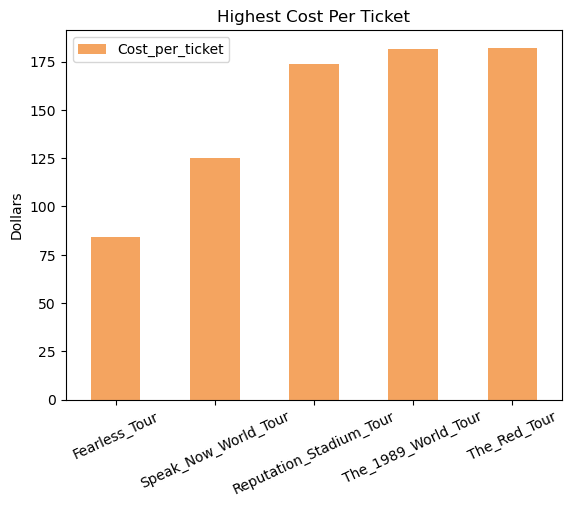

In [141]:
highest_cost_per_tickets = without_duplicates.groupby(["Tour"]).max()[["Cost_per_ticket"]].sort_values(by='Cost_per_ticket',ascending=True)
highest_cost_per_tickets.plot(kind='bar',title='Highest Cost Per Ticket',color='sandybrown',ylabel='Dollars',xlabel='',rot=25)
highest_cost_per_tickets = highest_cost_per_tickets.reset_index().rename(columns={'Tour':'Tour','Cost_per_ticket':'Highest Cost Per Ticket ($)'})
highest_cost_per_tickets

,Tour,Total Tickets Sold (Millions)
0,Fearless_Tour,1.48
1,Speak_Now_World_Tour,1.65
2,The_Red_Tour,1.70
3,The_1989_World_Tour,2.42
4,Reputation_Stadium_Tour,2.89


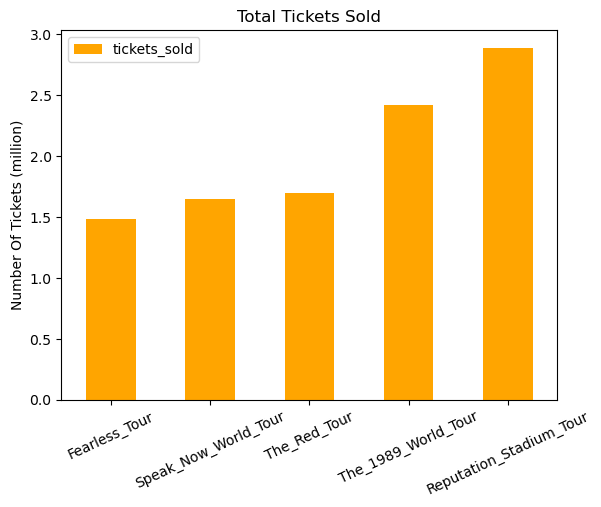

In [142]:
total_tickets_sold = without_duplicates.groupby(["Tour"]).sum()[["tickets_sold"]].sort_values(by='tickets_sold',ascending=True)
total_tickets_sold = total_tickets_sold/1000000
total_tickets_sold =total_tickets_sold.round(2)
total_tickets_sold.plot(kind='bar',title='Total Tickets Sold',color='orange',ylabel='Number Of Tickets (million)',xlabel='',rot=25)
total_tickets_sold = total_tickets_sold.reset_index().rename(columns={'Tour':'Tour','tickets_sold':'Total Tickets Sold (Millions)'})
total_tickets_sold

1. **An intresting thing can be noticed here, the total number of tickets sold by tour has seen an Uptrend with time whereas the number of events by tour has seen a downtrend, going from around 111 events for the First Tour to 53 events by the Last Tour.**

2. **This means that either the number of tickets sold per show has gone up with time OR the cost per ticket has gone up with upcoming tours,we will look into the later.**

                      Tour Average Cost Per Ticket (dollars)
0            Fearless_Tour                         52.344208
1     Speak_Now_World_Tour                         68.024298
2             The_Red_Tour                         83.950431
3      The_1989_World_Tour                        109.564449
4  Reputation_Stadium_Tour                        119.633649


,Tour,Average Cost Per Ticket (dollars)
0,Fearless_Tour,52.344208
1,Speak_Now_World_Tour,68.024298
2,The_Red_Tour,83.950431
3,The_1989_World_Tour,109.564449
4,Reputation_Stadium_Tour,119.633649


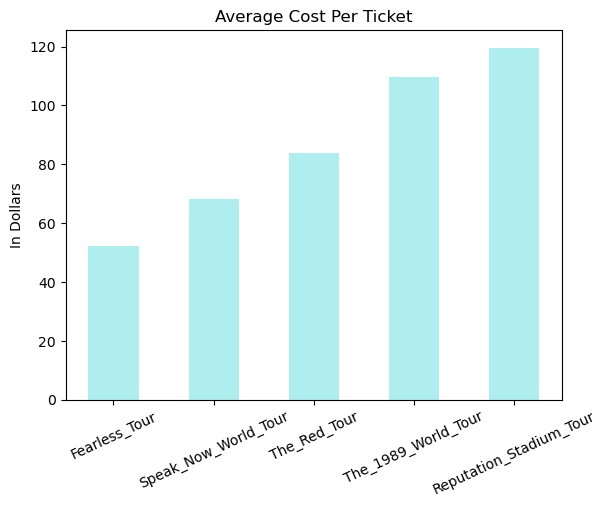

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is in a variable called 'without_duplicates'

# Create an empty DataFrame to store the results
df5 = pd.DataFrame(columns=['Tour', 'Average Cost Per Ticket (dollars)'])

unique_tour = without_duplicates['Tour'].unique()

for tour in unique_tour:
  # Filter data for the current tour
  avg_cost = without_duplicates[without_duplicates["Tour"]==tour]

  # Calculate statistics
  q1_1 = avg_cost['Cost_per_ticket'].quantile(0.25)
  q3_1 = avg_cost['Cost_per_ticket'].quantile(0.75)
  iqr_1 = q3_1 - q1_1
  lower_bound_1 = q1_1 - 1.5 * iqr_1
  upper_bound_1 = q3_1 + 1.5 * iqr_1

  # Filter data within bounds
  avg_cost = avg_cost[(avg_cost['Cost_per_ticket']>=lower_bound_1 ) & (avg_cost['Cost_per_ticket']<=upper_bound_1)]

  # Calculate central tendency
  cost_per_ticket_central_tendency = avg_cost['Cost_per_ticket'].mean()

  # Create a new row (Series) with the calculated values
  new_row = pd.Series({'Tour': tour, 'Average Cost Per Ticket (dollars)': cost_per_ticket_central_tendency})

  # Append the new row to the existing DataFrame
  df5 = pd.concat([df5, new_row.to_frame().T], ignore_index=True)  # .T for row-wise append

# Now you can use df5 for further analysis and plotting
xpoints = df5['Tour']
ypoints = df5['Average Cost Per Ticket (dollars)']
plt.bar(xpoints, ypoints, width=0.5, color="paleturquoise")
plt.title("Average Cost Per Ticket")
plt.ylabel("In Dollars")
plt.tick_params(axis='x', rotation=25)

print(df5)  # This will display the final DataFrame
df5

1. **We can see a steady increase in the cost to buy a ticket over the years.**

2. **This can explain, the major increase in Revenue genration over the years eventhough the number of events have decreased with each consecutive Tour.**

3. **Definetly there are many other extenal factors affecting this such as inflation, many qualitative factors, etc but this is a trend we can observe.**

# **Thank You! Hope it helped.**